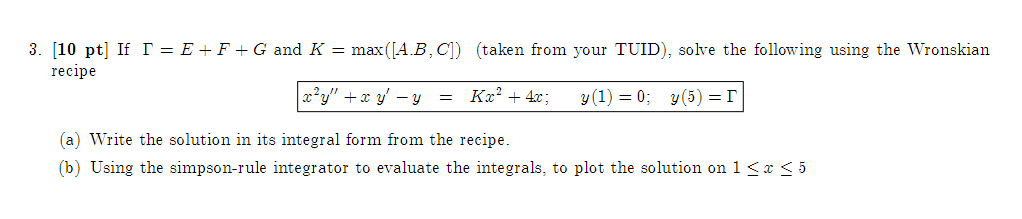

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, simps

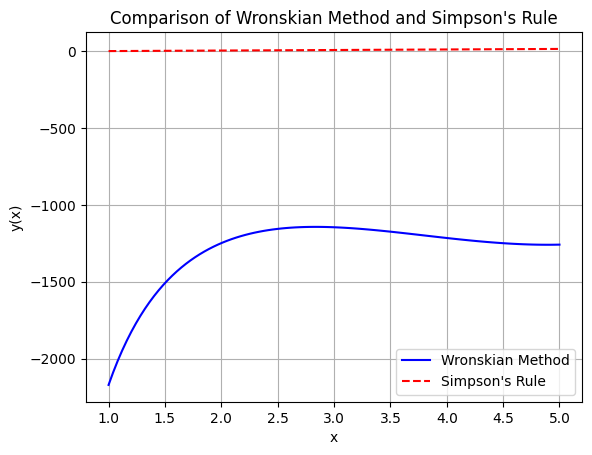

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, simps

# Define the differential equation system
def system(Y, x):
    y, z = Y  # y = y(x) and z = y'(x)
    dydx = z
    dzdx = (y - x*z + 9*x - 4)/x**2
    return [dydx, dzdx]

def wronskian_method(x_values):
    # Initial conditions for homogeneous solutions
    Y1_0 = [0, 1]  # For y1
    Y2_0 = [1, 0]  # For y2
    
    sol_y1 = odeint(system, Y1_0, x_values)
    sol_y2 = odeint(system, Y2_0, x_values)

    y1 = sol_y1[:, 0]
    y1_prime = sol_y1[:, 1]
    y2 = sol_y2[:, 0]
    y2_prime = sol_y2[:, 1]

    # Calculate Wronskian
    W = y1 * y2_prime - y2 * y1_prime
    
    # Calculate yp using variation of parameters
    f = 9*x_values**2 + 4*x_values
    u1_prime = -y2 * f / W
    u2_prime = y1 * f / W
    
    u1 = np.cumsum(u1_prime) * (x_values[1] - x_values[0])
    u2 = np.cumsum(u2_prime) * (x_values[1] - x_values[0])
    
    yp = u1 * y1 + u2 * y2
    
    # Solve for c1 and c2 using boundary conditions
    # This will be an approximation based on the boundary conditions provided
    c1 = (14 - yp[-1] - y2[-1]*u2[-1]) / y1[-1]
    c2 = (14 - yp[-1] - y1[-1]*u1[-1]) / y2[-1]
    
    y = c1*y1 + c2*y2 + yp
    return y

# Simpsons rule integrator
def simpsons_rule(x_values):
    y0 = 0
    Y = [y0]
    z0 = (14-y0)/(x_values[-1]-x_values[0])
    
    for i in range(1, len(x_values)):
        x = x_values[i]
        h = x_values[i] - x_values[i-1]
        k1 = h * system([Y[-1], z0], x_values[i-1])[0]
        k2 = h * system([Y[-1]+k1/2, z0], x_values[i-1]+h/2)[0]
        k3 = h * system([Y[-1]+k2/2, z0], x_values[i-1]+h/2)[0]
        k4 = h * system([Y[-1]+k3, z0], x_values[i])[0]
        Y.append(Y[-1] + (k1 + 2*k2 + 2*k3 + k4)/6)
    return Y

# Main program
x_values = np.linspace(1, 5, 100)
y_wronskian = wronskian_method(x_values)
y_simpsons = simpsons_rule(x_values)

plt.plot(x_values, y_wronskian, label="Wronskian Method", color="blue")
plt.plot(x_values, y_simpsons, label="Simpson's Rule", linestyle='--', color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Comparison of Wronskian Method and Simpson's Rule")
plt.grid(True)
plt.show()
